In [3]:
# Step 1: Upload the zip file
from google.colab import files

uploaded = files.upload()

# Step 2: Extract the CSV file
import zipfile
import os

# Define the zip file name and the directory to extract to
zip_file_name = 'archive.zip'
extract_dir = '/content'

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print(extracted_files)

# Step 3: Load the extracted CSV file
import pandas as pd

# Assuming the CSV file is named 'GS_option_prices.csv'
csv_file_path = os.path.join(extract_dir, 'option_GS_df.csv')
df = pd.read_csv(csv_file_path)

# Display the first few rows
print(df.head())



Saving archive.zip to archive (2).zip
['.config', 'archive.zip', 'archive (1).zip', 'option_GS_df.csv', 'archive (2).zip', 'sample_data']
   Unnamed: 0  UnderlyingPrice       OptionSymbol  Type  Expiration  \
0           0           174.09  GS160108C00125000  call  01/08/2016   
1           1           174.09  GS160108P00125000   put  01/08/2016   
2           2           174.09  GS160108C00130000  call  01/08/2016   
3           3           174.09  GS160108P00130000   put  01/08/2016   
4           4           174.09  GS160108C00135000  call  01/08/2016   

     DataDate  Strike  Last    Bid    Ask  ...  OpenInterest  T1OpenInterest  \
0  01/05/2016   125.0   0.0  46.95  50.80  ...             0               0   
1  01/05/2016   125.0   0.0   0.00   0.31  ...             0               0   
2  01/05/2016   130.0   0.0  41.80  45.80  ...             0               0   
3  01/05/2016   130.0   0.0   0.00   0.31  ...             0               0   
4  01/05/2016   135.0   0.0  36.95 

In [4]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S: spot price
    K: strike price
    T: time to maturity
    r: risk-free rate
    sigma: volatility of underlying asset
    option_type: 'call' or 'put'
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price


Saving archive.zip to archive (3).zip
['.config', 'archive (3).zip', 'archive.zip', 'archive (1).zip', 'option_GS_df.csv', 'archive (2).zip', 'sample_data']
   Unnamed: 0  UnderlyingPrice       OptionSymbol  Type  Expiration  \
0           0           174.09  GS160108C00125000  call  01/08/2016   
1           1           174.09  GS160108P00125000   put  01/08/2016   
2           2           174.09  GS160108C00130000  call  01/08/2016   
3           3           174.09  GS160108P00130000   put  01/08/2016   
4           4           174.09  GS160108C00135000  call  01/08/2016   

     DataDate  Strike  Last    Bid    Ask  ...  OpenInterest  T1OpenInterest  \
0  01/05/2016   125.0   0.0  46.95  50.80  ...             0               0   
1  01/05/2016   125.0   0.0   0.00   0.31  ...             0               0   
2  01/05/2016   130.0   0.0  41.80  45.80  ...             0               0   
3  01/05/2016   130.0   0.0   0.00   0.31  ...             0               0   
4  01/05/2016   

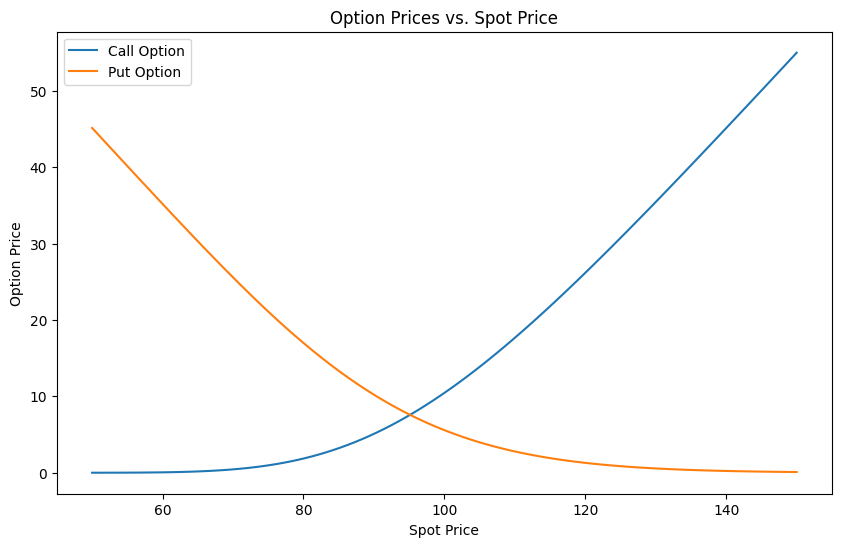

In [9]:
# Setup Environment
!pip install numpy scipy matplotlib

import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load dataset from Kaggle
# df = pd.read_csv('path/to/GS_option_prices.csv')

# Step 1: Upload the zip file
from google.colab import files

uploaded = files.upload()

# Step 2: Extract the CSV file
import zipfile
import os

# Define the zip file name and the directory to extract to
zip_file_name = 'archive.zip'
extract_dir = '/content'

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print(extracted_files)

# Step 3: Load the extracted CSV file
import pandas as pd

# Assuming the CSV file is named 'GS_option_prices.csv'
csv_file_path = os.path.join(extract_dir, 'option_GS_df.csv')
df = pd.read_csv(csv_file_path)

# Display the first few rows
print(df.head())

# Black-Scholes Model Implementation
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    S: spot price
    K: strike price
    T: time to maturity
    r: risk-free rate
    sigma: volatility of underlying asset
    option_type: 'call' or 'put'
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price


# example implementation of BLACK-SCHOLES MODEL

# Example parameters
S = 100  # Spot price
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

call_price = black_scholes(S, K, T, r, sigma, option_type='call')
put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print(f"Call Option Price: {call_price}")
print(f"Put Option Price: {put_price}")

# Visualize Option Prices
# Varying the spot price
S_values = np.linspace(50, 150, 100)
call_prices = [black_scholes(S, K, T, r, sigma, option_type='call') for S in S_values]
put_prices = [black_scholes(S, K, T, r, sigma, option_type='put') for S in S_values]

plt.figure(figsize=(10, 6))
plt.plot(S_values, call_prices, label='Call Option')
plt.plot(S_values, put_prices, label='Put Option')
plt.xlabel('Spot Price')
plt.ylabel('Option Price')
plt.title('Option Prices vs. Spot Price')
plt.legend()
plt.show()


Saving archive.zip to archive (12).zip
['.config', 'archive (7).zip', 'archive (5).zip', 'archive (10).zip', 'archive (3).zip', 'archive.zip', 'archive (9).zip', 'archive (8).zip', 'archive (4).zip', 'archive (1).zip', 'archive (12).zip', 'option_GS_df.csv', 'archive (6).zip', 'archive (2).zip', 'archive (11).zip', 'sample_data']
   Unnamed: 0  UnderlyingPrice       OptionSymbol  Type  Expiration  \
0           0           174.09  GS160108C00125000  call  01/08/2016   
1           1           174.09  GS160108P00125000   put  01/08/2016   
2           2           174.09  GS160108C00130000  call  01/08/2016   
3           3           174.09  GS160108P00130000   put  01/08/2016   
4           4           174.09  GS160108C00135000  call  01/08/2016   

     DataDate  Strike  Last    Bid    Ask  ...  OpenInterest  T1OpenInterest  \
0  01/05/2016   125.0   0.0  46.95  50.80  ...             0               0   
1  01/05/2016   125.0   0.0   0.00   0.31  ...             0               0   
2

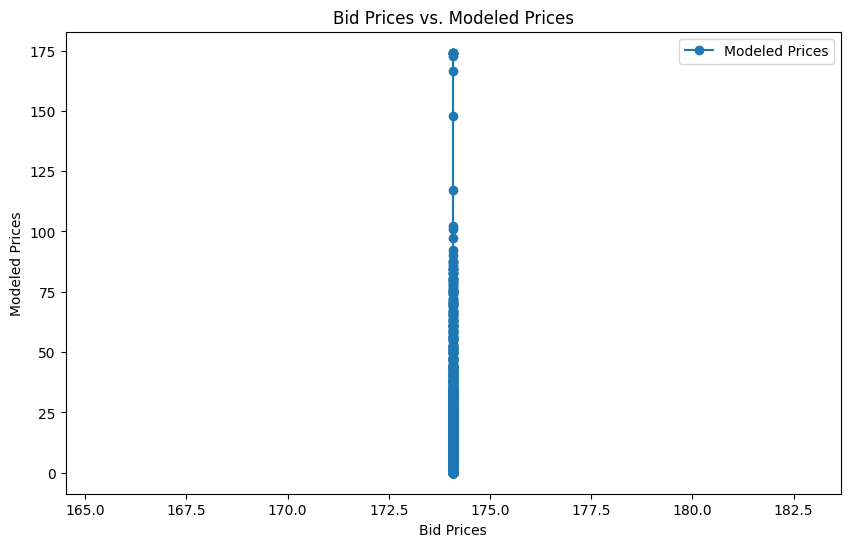

In [18]:
# MAIN CODE AS PER DAATSET

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function for Black-Scholes model
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# Load dataset from Kaggle
# Note: Make sure to upload the zip file containing the dataset to your Google Colab environment
from google.colab import files
uploaded = files.upload()

import zipfile
import os

# Define the zip file name and the directory to extract to
zip_file_name = 'archive.zip'
extract_dir = '/content'

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print(extracted_files)

# Assuming the CSV file is named 'GS_option_prices.csv'
csv_file_path = os.path.join(extract_dir, 'option_GS_df.csv')
df = pd.read_csv(csv_file_path)

# Display the first few rows to understand the structure
print(df.head())

# Extract relevant parameters from the dataset
# Assuming the columns are named as 'Underlying_Price', 'Strike_Price', 'Time_to_Maturity', 'Risk_Free_Rate', 'Volatility'
S = df['UnderlyingPrice']
K = df['Strike']
T = 0.2520547945
r = df['Vega']
sigma = df['IVMean']

# Calculate modeled prices using the Black-Scholes model
modeled_prices = [black_scholes(S[i], K[i], T, r[i], sigma[i], option_type='call') for i in range(len(df))]

# Create DataFrame to display Bid prices and Modeled Prices
result_df = pd.DataFrame({
    'Bid': S,
    'm_prices': modeled_prices
})

# Display DataFrame
print(result_df.head(20))

# Plot the prices if necessary
plt.figure(figsize=(10, 6))
plt.plot(S, modeled_prices, 'o-', label='Modeled Prices')
plt.xlabel('Bid Prices')
plt.ylabel('Modeled Prices')
plt.title('Bid Prices vs. Modeled Prices')
plt.legend()
plt.show()


**MAIN CODE**